Download the dataset from the link: https://github.com/Mahmudul-Hasan-Moon/python_for_research_assignment
        
        1. Invistigate the dataset, find out the variable types, number of missing values and others.
        
        2. Handle the missing values
        
        3. Balance the dataset using the methods that discussed in lecture 4.5

In [2]:
#STEP-1: Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#STEP-3: Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'117xdWQtNXYlFTGmOG6aDnnU4ztds63SA'}) # replace the id with id of file you want to access
downloaded.GetContentFile('heart.csv')

In [3]:
import pandas as pd
data = pd.read_csv('heart.csv')
originalCopy = data

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


---
```
1. Invistigate the dataset, find out the variable types, number of missing values and others.

2. Handle the missing values
```
---

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [33]:
x = data.columns
print(x)
print()
print("Total columns:",len(x))

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Total columns: 14


In [34]:
p = data.to_string()
print(p)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1        0      150      0      2.3      0   0     1       1
1     37    1   2       130   250    0        1      187      0      3.5      0   0     2       1
2     41    0   1       130   204    0        0      172      0      1.4      2   0     2       1
3     56    1   1       120   236    0        1      178      0      0.8      2   0     2       1
4     57    0   0       120   354    0        1      163      1      0.6      2   0     2       1
5     57    1   0       140   192    0        1      148      0      0.4      1   0     1       1
6     56    0   1       140   294    0        0      153      0      1.3      1   0     2       1
7     44    1   1       120   263    0        1      173      0      0.0      2   0     3       1
8     52    1   2       172   199    1        1      162      0      0.5      2   0     3       1
9     57    1   2   

In [35]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
x = data.isnull().to_string()
print(x)

       age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  oldpeak  slope     ca   thal  target
0    False  False  False     False  False  False    False    False  False    False  False  False  False   False
1    False  False  False     False  False  False    False    False  False    False  False  False  False   False
2    False  False  False     False  False  False    False    False  False    False  False  False  False   False
3    False  False  False     False  False  False    False    False  False    False  False  False  False   False
4    False  False  False     False  False  False    False    False  False    False  False  False  False   False
5    False  False  False     False  False  False    False    False  False    False  False  False  False   False
6    False  False  False     False  False  False    False    False  False    False  False  False  False   False
7    False  False  False     False  False  False    False    False  False    False  False  False  False 

In [37]:
if "True" in x:
  msg = "There are one or multiple null values present in this dataset that needs to be handled."
else:
  msg = "There are no null values present in this dataset. Hence, This dataset is clean from null values"
print(msg)

There are no null values present in this dataset. Hence, This dataset is clean from null values


`3. Balance the dataset using the methods that discussed in lecture 4.5`

In [39]:
#print(originalCopy)
col = originalCopy["target"]
total_entries = len(col)
print("Total entries:",total_entries)
#print(col)
d = {}
for i in col:
  if i ==1:
    d[i]= d.get(i,0)+1
  elif i == 0:
    d[i]= d.get(i,0)+1
print(d)

Total entries: 303
{1: 165, 0: 138}


In [12]:
from collections import Counter
col = originalCopy["target"]
Counter(col)

Counter({0: 138, 1: 165})

In [18]:
#class count
ones, zeros = originalCopy['target'].value_counts()
print("Total Zeros(0):",zeros)
print("Total Ones(1):",ones)

#Separate class
class_0 = originalCopy[originalCopy['target']==0] 
class_1 = originalCopy[originalCopy['target']==1] #print the shape of the class
print('class 0:',class_0.shape) 
print('class 1:',class_1.shape) 

Total Zeros(0): 138
Total Ones(1): 165
class 0: (138, 14)
class 1: (165, 14)




---



#**UNDER SAMPLING**


---



**Random under sampling**

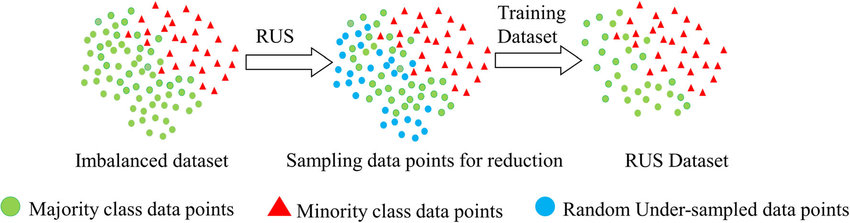

Total class of 1 and 0: 1    138
0    138
Name: target, dtype: int64



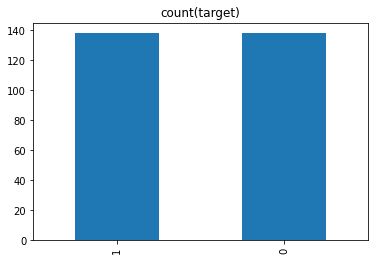

In [14]:
class_1_under = class_1.sample(zeros)

test_under = pd.concat([class_1_under,class_0],axis = 0)

print("Total class of 1 and 0:",test_under["target"].value_counts()) #plot the count after undersampling
print()
test_under["target"].value_counts().plot(kind ='bar',title = 'count(target)')

**Random under-sampling with imblearn**

In [15]:
from collections import Counter as counter
from imblearn.under_sampling import RandomUnderSampler
x = originalCopy.drop(["target"],axis=1) #Predictor variable
y = originalCopy["target"] #Target variable
rus = RandomUnderSampler(random_state = 42, replacement = True) #Fit predictor ad target variable | random_state => Hyperparameter tuning
x_rus, y_rus = rus.fit_resample(x,y) #Resampling
print("Original dataset shape:",counter(y)," Note: This is before resampling.") 
print("Resample dataset shape:",counter(y_rus)," Note: This is after resampling.")

Original dataset shape: Counter({1: 165, 0: 138})  Note: This is before resampling.
Resample dataset shape: Counter({0: 138, 1: 138})  Note: This is after resampling.


**Near-miss**


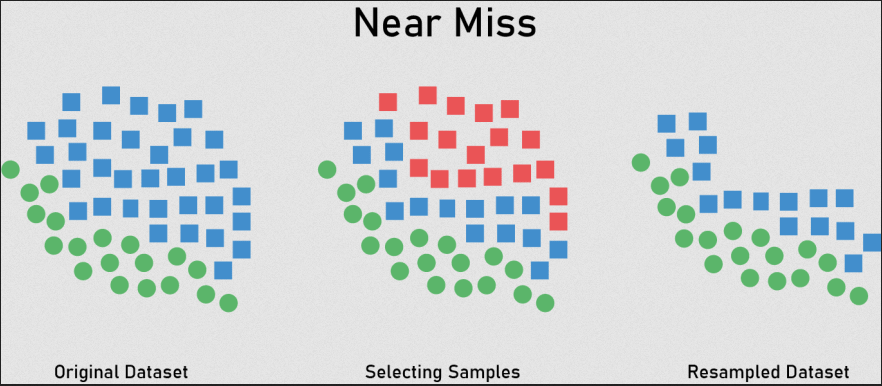

In [17]:
from collections import Counter as counter
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x = originalCopy.drop(["target"],axis = 1)
y = originalCopy["target"]
x_nm, y_nm = nm.fit_resample(x,y)

print("Original dataset shape",counter(y))
print("Resampled dataset shape",counter(y_nm))

Original dataset shape Counter({1: 165, 0: 138})
Resampled dataset shape Counter({0: 138, 1: 138})




---

#**Over sampling**



---



In [20]:
#class count
ones, zeros = originalCopy['target'].value_counts()
print("Total Zeros(0):",zeros)
print("Total Ones(1):",ones)

#Separate class
class_0 = originalCopy[originalCopy['target']==0] 
class_1 = originalCopy[originalCopy['target']==1] #print the shape of the class
print('class 0:',class_0.shape) 
print('class 1:',class_1.shape) 

Total Zeros(0): 138
Total Ones(1): 165
class 0: (138, 14)
class 1: (165, 14)


**Random over sampling**

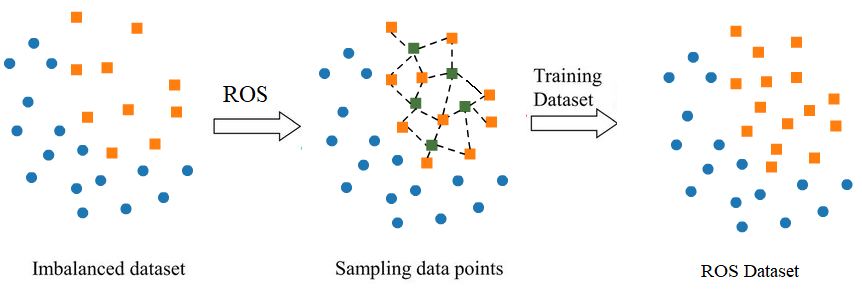

Total class of 1 & 0: 1    165
0    165
Name: target, dtype: int64



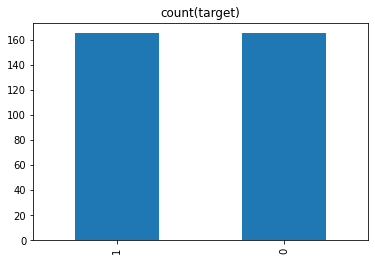

In [26]:
class_0_over = class_0.sample(ones, replace = True)
test_over = pd.concat([class_0_over,class_1],axis = 0)
print("Total class of 1 & 0:",test_over["target"].value_counts()) #Plot the count after over sampling
print()
test_over["target"].value_counts().plot(kind ='bar',title = 'count(target)')

**Random over-sampling with imblearn**

In [28]:
from collections import Counter as counter
from imblearn.over_sampling import RandomOverSampler
x = originalCopy.drop(["target"],axis =1) #Predictor variable
y = originalCopy["target"] #Target variable

ros = RandomOverSampler(random_state = 42) #Fit predictor ad target variable | random_state => Hyperparameter tuning
x_ros, y_ros = ros.fit_resample(x,y) #Resampling

print("Original dataset shape:",counter(y)," Note: This is before resampling.") 
print("Resample dataset shape:",counter(y_ros)," Note: This is after resampling.")

Original dataset shape: Counter({1: 165, 0: 138})  Note: This is before resampling.
Resample dataset shape: Counter({1: 165, 0: 165})  Note: This is after resampling.


**Synthetic minority oversampling technique (SMOTE)**

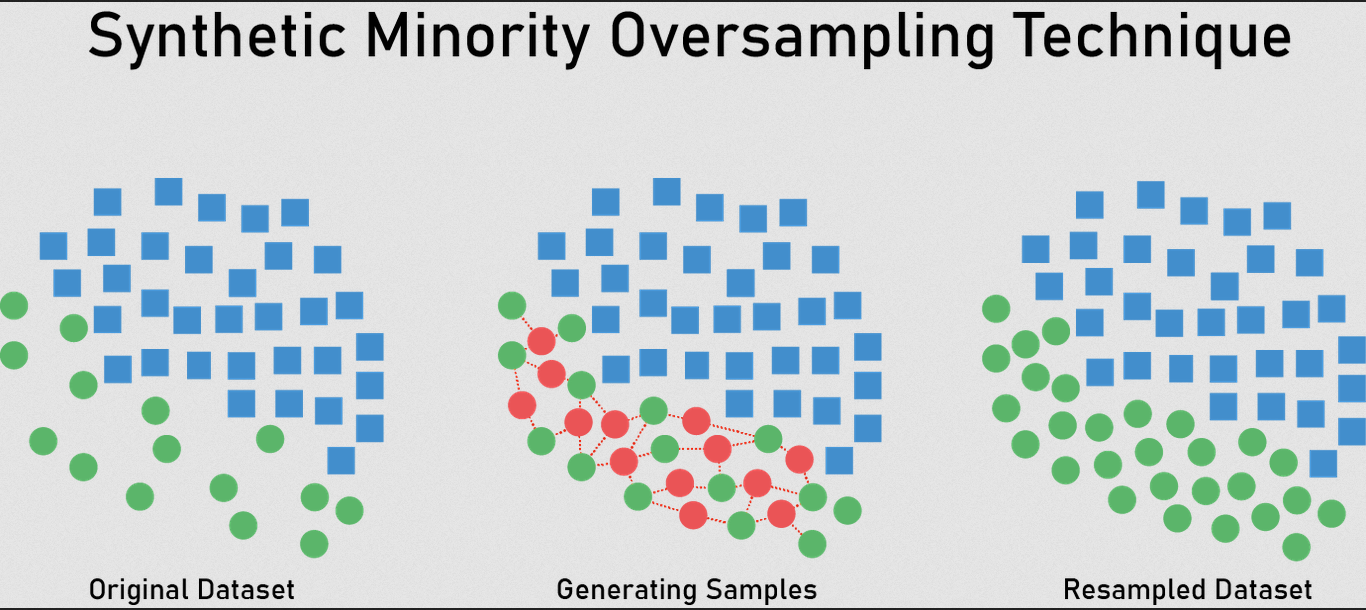

In [31]:
from collections import Counter as counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x = originalCopy.drop(["target"],axis = 1) #Predictor variable
y = originalCopy["target"] #Target variable

x_smote, y_smote = smote.fit_resample(x,y) #Fit predictor and target variable

print('Original dataset shape', counter(y))
print('Resample dataset shape', counter(y_ros))

Original dataset shape Counter({1: 165, 0: 138})
Resample dataset shape Counter({1: 165, 0: 165})
